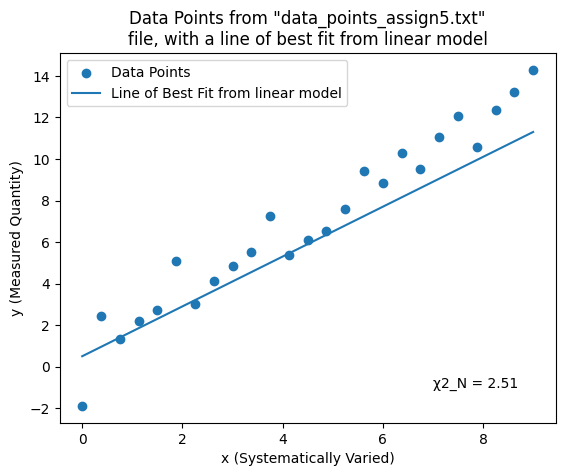

The reduced-chi squared value from our initial model is: 2.51, and this is larger then
the magnitude of the uncertainty (order of 1), meaning this model is not very accurate.



In [4]:
#1a-1d
import matplotlib.pyplot as plt
import numpy as np
import math

#for input slope and intercept, return y = mx + b
def linear_model(x,param):
    slope, intercept = param
    result = slope*x + intercept
    return result

#this function quantifies how "good" our line of best fit is
def reduced_chi(expected, observed, uncertainty=1):
    i = 0
    sum = 0
    while(i<N):
        sum = sum + ( (expected[i]-observed[i])/uncertainty )**2
        i = i + 1
    result = sum/N
    return result

#this opens the data file and creates two lists for the "x" and "y" values
data_file = open("data_points_assign5.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
x_List = []
y_List = []
N = len(data_list)-1
i = 0
while (i<N):
    components = data_list[i]
    components = components.split("  ") #splitting at every space to seperate x and y components
    x_List.append(components[0])
    y_List.append(components[1])
    i = i + 1
x = np.float_(x_List)
y = np.float_(y_List)

#this calls the linear_model function to make a line of best fit
slope0, intercept0 = 1.2, 0.5
y_model = linear_model(x, (slope0, intercept0))
quality = reduced_chi(y_model,y,1)

#this makes figure of data points and line of best fit
plt.figure()
plt.scatter(x,y) #this plots the data points
plt.plot(x,y_model) #this plots the line of best fit
plt.text(7,-1,'χ2_N = %0.2f'%(quality)) #reduced chi^2 value of line of best fit
plt.xlabel('x (Systematically Varied)')
plt.ylabel('y (Measured Quantity)')
plt.title('Data Points from "data_points_assign5.txt"\nfile, with a line of best fit from linear model')
plt.legend(['Data Points','Line of Best Fit from linear model'])
plt.show()

print("The reduced-chi squared value from our initial model is: %0.2f, and this is larger then"%quality)
print("the magnitude of the uncertainty (order of 1), meaning this model is not very accurate.\n")

The scatter points in the graph above come from the given text file named "data_points_assign5.txt". The plot on the figure is the "line of best fit" generated with an estimated slope and y intercept. For this line, the slope, "m", is set to 1.2 and the y-intercept, "b", is set to 0.5. The calculated reduced chi-squared value for this line of best fit was calculated to be 2.51, which is larger then the magnitude of the uncertainty, meaning this model is not very accurate. We can tell that qualitatitively too; Clearly the line does not represent the data well, especially as x becomes larger. Nearly all of the higher data points are nowhere near the line of best fit.

The coordinates in the reduced-chi squared matrix with the lowest chi value are: (12, 49)
Which correspond to values: m = 1.47 and b = 0.36.

The minimum reduced chi squared value is: 0.86, which is significantly better than
the original model with a chi squared value of 2.51.




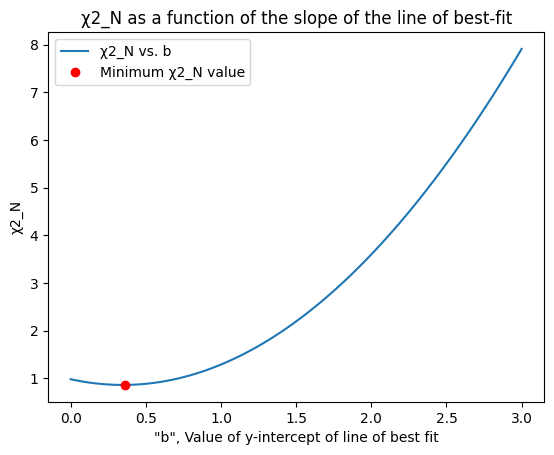

The above figure is the reduced chi vs. intercept plot. To create this plot, the slope was set constant to index [49].
The red dot is at the intercept list index of [12] and χ2_N[12,49]. As you can see, this is the minimum point for χ2_N,
meaning our process from before was correct, and this is the lowest χ2_N value.



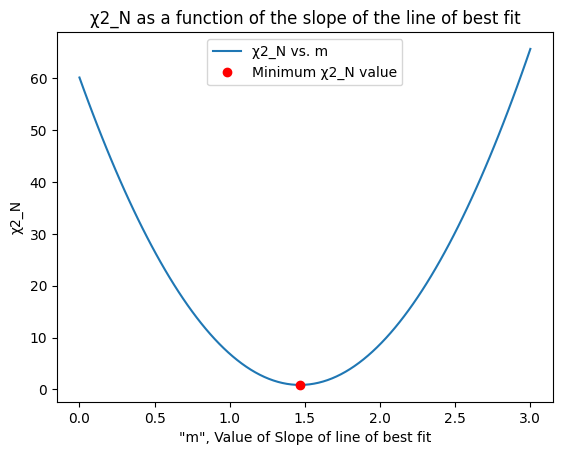

The above figure is the reduced chi vs. intercept plot. To create this plot, the intercept was set constant to index [12].
The red dot is at the slope list index of [49] and χ2_N[12,49]. As you can see, this is the minimum point for χ2_N,
meaning our process from before was correct, and this is the lowest χ2_N value.



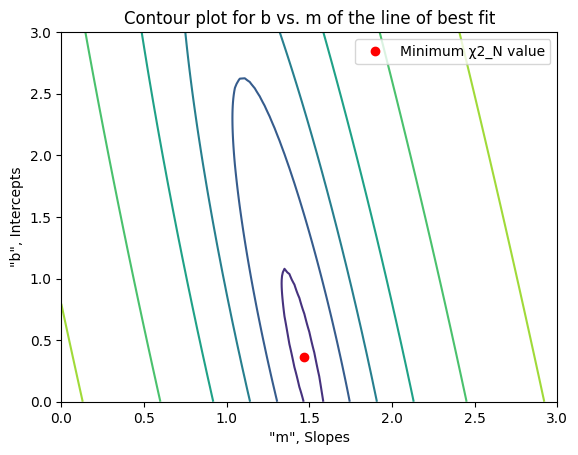

The above figure is a contour plot of the intercepts vs. slopes, with log(χ2_N) being the Z-axis.
The chi value is put through a logarithmn because it makes the bands "thinner" and easier to see
the minimum. The red dot is the minimum χ2_N value, at coordinates slope[49],intercept[12].


In [5]:
#1e-1h
import matplotlib.pyplot as plt
import numpy as np
import math

#for input slope and intercept, return y = mx + b
def linear_model(x,param):
    slope, intercept = param
    result = slope*x + intercept
    return result

#this function quantifies how "good" our line of best fit is
def reduced_chi(expected, observed, uncertainty=1):
    i = 0
    sum = 0
    while(i<N):
        sum = sum + ( (expected[i]-observed[i])/uncertainty )**2
        i = i + 1
    result = sum/N
    return result

#this opens the data file and creates two lists for the "x" and "y" values
data_file = open("data_points_assign5.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
x_List = []
y_List = []
N = len(data_list)-1
i = 0
while (i<N):
    components = data_list[i]
    components = components.split("  ") #splitting at every space to seperate x and y components
    x_List.append(components[0])
    y_List.append(components[1])
    i = i + 1
x = np.float_(x_List)
y = np.float_(y_List)

#this is making a 2D array of chi values for various intercepts and slopes.
#row = intercept, column = slope
intercept_sequence = np.linspace(0.0,3.0,101)
slope_sequence = np.linspace(0.0,3.0,101)
rchi2 = np.zeros( (len(intercept_sequence),len(slope_sequence)) ) #initializing rchi matrix
for m in range(101):
    for n in range(101):
        y_model = linear_model(x, (slope_sequence[n], intercept_sequence[m]))
        chi = reduced_chi(y_model,y,1)
        rchi2[m,n] = chi

#this finds minimum chi value coordinates in chi array
chi = np.argmin(rchi2)
chi = np.unravel_index(chi,(101,101))

#print statements to explain
print("The coordinates in the reduced-chi squared matrix with the lowest chi value are:",chi)
print("Which correspond to values: m = %0.2f and b = %0.2f.\n"%(slope_sequence[49],intercept_sequence[12]))
print("The minimum reduced chi squared value is: %0.2f, which is significantly better than"%rchi2[12,49])
print("the original model with a chi squared value of %0.2f.\n\n"%quality)

#this makes reduced-chi-squared vs intercept graph
plt.figure()
plt.plot(intercept_sequence,rchi2[:,49]) #this plots the line of best fit
plt.plot(intercept_sequence[12], rchi2[12,49], 'ro') #puts red marker at initial estimated root
plt.xlabel('"b", Value of y-intercept of line of best fit')
plt.ylabel('χ2_N')
plt.title('χ2_N as a function of the slope of the line of best-fit')
plt.legend(['χ2_N vs. b','Minimum χ2_N value'])
plt.show()

print("The above figure is the reduced chi vs. intercept plot. To create this plot, the slope was set constant to index [49].")
print("The red dot is at the intercept list index of [12] and χ2_N[12,49]. As you can see, this is the minimum point for χ2_N,")
print("meaning our process from before was correct, and this is the lowest χ2_N value.\n")

#this makes reduced-chi-squared vs slope graph
plt.figure()
plt.plot(intercept_sequence,rchi2[12,:]) #this plots the line of best fit
plt.plot(slope_sequence[49], rchi2[12,49], 'ro') #puts red marker at initial estimated root
plt.xlabel('"m", Value of Slope of line of best fit')
plt.ylabel('χ2_N')
plt.title('χ2_N as a function of the slope of the line of best fit')
plt.legend(['χ2_N vs. m','Minimum χ2_N value'])
plt.show()

print("The above figure is the reduced chi vs. intercept plot. To create this plot, the intercept was set constant to index [12].")
print("The red dot is at the slope list index of [49] and χ2_N[12,49]. As you can see, this is the minimum point for χ2_N,")
print("meaning our process from before was correct, and this is the lowest χ2_N value.\n")

#this contour plot of intercept vs slope with the logarithmn of rchi^2 as the z-axis
xx, yy = np.meshgrid(slope_sequence,intercept_sequence)
plt.figure()
plt.plot(slope_sequence[49], intercept_sequence[12],'ro')
plt.contour(xx,yy,np.log(rchi2))
plt.title('Contour plot for b vs. m of the line of best fit')
plt.xlabel('"m", Slopes')
plt.ylabel('"b", Intercepts')
plt.legend(['Minimum χ2_N value'])
plt.show()

print("The above figure is a contour plot of the intercepts vs. slopes, with log(χ2_N) being the Z-axis.")
print('The chi value is put through a logarithmn because it makes the bands "thinner" and easier to see')
print("the minimum. The red dot is the minimum χ2_N value, at coordinates slope[49],intercept[12].")


The objective of this code is to identiy the most ideal "m" and "b" values in order to minimize the reduced chi-squared value. The reason we are doing this is to create the best line of best fit possible for the given data. The first figure is representing what the reduced chi-squared values are when the slope is changed (and the y-intercept is held constant), while the second figure is representing what the reduced chi-squared values are when the y-intercept is changed (and the slope is held constant.) As seen above, both graphs have a minimum, meaning that when the slope and y-intercept are set to those minimums, the reduced chi-squared value will be as small as possible.

The calculated best possible line of fit (i.e. the smallest reduced-chi squared value possible) occured when m = 1.47 and b = 0.36. This corresponds to a reduced chi-squared value of 0.86, which is significantly better then the original reduced chi-squared value of 2.51, meaning this line of best fit fits the data much better.

The last figure is a contour plot of the intercepts vs slopes, with log(χ2_N) being the Z-axis (colors) of the plot. The reduced chi-squared value is put through a logarithmn because it makes the bands "thinner" and easier to see on the colormap. The red dot is at the minimum χ2_N value, which makes sense as it is at the center of the smallest ring on the contour plot.

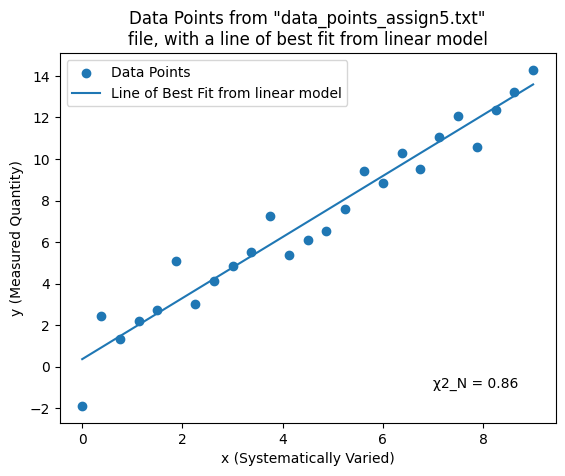

This line of best fit is much more accurate compared to our original model. We can tell
qualitatively simply through the eye test, it looks like a much more accurate line of best fit.
We can also tell quantitatively through the a much lower reduced-chi^2 value


In [6]:
#plotting best line of best fit, not sure if this is required or not but i thought it was interesting so i included it anyways

import matplotlib.pyplot as plt
import numpy as np
import math

#for input slope and intercept, return y = mx + b
def linear_model(x,param):
    slope, intercept = param
    result = slope*x + intercept
    return result

#this function quantifies how "good" our line of best fit is
def reduced_chi(expected, observed, uncertainty=1):
    i = 0
    sum = 0
    while(i<N):
        sum = sum + ( (expected[i]-observed[i])/uncertainty )**2
        i = i + 1
    result = sum/N
    return result

#this opens the data file and creates two lists for the "x" and "y" values
data_file = open("data_points_assign5.txt","r")
data = data_file.read()
data_list = data.split("\n") #making a list by splitting at every new line
x_List = []
y_List = []
N = len(data_list)-1
i = 0
while (i<N):
    components = data_list[i]
    components = components.split("  ") #splitting at every space to seperate x and y components
    x_List.append(components[0])
    y_List.append(components[1])
    i = i + 1
x = np.float_(x_List)
y = np.float_(y_List)

slope0, intercept0 = slope_sequence[49], intercept_sequence[12]
y_model = linear_model(x, (slope0, intercept0))

#this makes figure of data points and line of best fit
plt.figure()
plt.scatter(x,y) #this plots the data points
plt.plot(x,y_model) #this plots the line of best fit
plt.text(7,-1,'χ2_N = %0.2f'%(rchi2[12,49])) #reduced chi^2 value of line of best fit
plt.xlabel('x (Systematically Varied)')
plt.ylabel('y (Measured Quantity)')
plt.title('Data Points from "data_points_assign5.txt"\nfile, with a line of best fit from linear model')
plt.legend(['Data Points','Line of Best Fit from linear model'])
plt.show()

print("This line of best fit is much more accurate compared to our original model. We can tell")
print("qualitatively simply through the eye test, it looks like a much more accurate line of best fit.")
print("We can also tell quantitatively through the a much lower reduced-chi^2 value")

This plot is using our calculated "m" and "b" values (m = 1.47 and b = 0.36) to plot the new line of fit. Qualitatively, we can pretty obviously see the vast improvement from the original figure. We can also tell the improvement quantitatively through the much reduced chi-sqare value. Before it was at 2.51, whereas now it is 0.86.